In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor

from sklearn import metrics

from sklearn.model_selection import GridSearchCV
df = pd.read_csv('ENB2012_data.csv')

df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


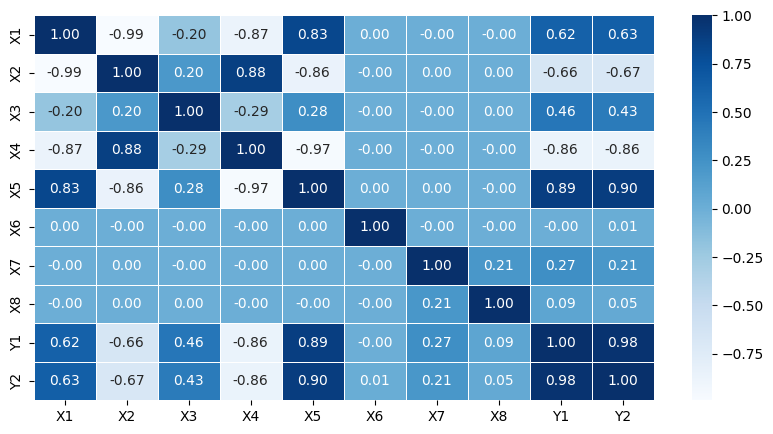

In [63]:
corr = df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white',  cmap='Blues')
plt.show()

In [65]:
columns_to_drop = ['X6','Y2']
X = df.drop(columns=columns_to_drop, axis=1)
y = df['Y1']  
X


,X1,X2,X3,X4,X5,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,0.0,0,20.84
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.4,5,17.88
764,0.62,808.5,367.5,220.50,3.5,0.4,5,16.54
765,0.62,808.5,367.5,220.50,3.5,0.4,5,16.44
766,0.62,808.5,367.5,220.50,3.5,0.4,5,16.48


In [66]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df.describe().loc[['min', 'mean', 'std', 'max']].T.style.background_gradient(axis=1)

,min,mean,std,max
X1,0.000000,0.400463,0.293826,1.000000
X2,0.000000,0.534722,0.299613,1.000000
X3,0.000000,0.428571,0.254382,1.000000
X4,0.000000,0.601852,0.409668,1.000000
X5,0.000000,0.500000,0.500326,1.000000
X7,0.000000,0.585938,0.333051,1.000000
X8,0.000000,0.562500,0.310192,1.000000
Y1,0.000000,0.439396,0.272046,1.000000


In [67]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.1)

In [68]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [69]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 1000,activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(trainX_scaled, trainY)

MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=1000)

In [70]:
y_pred = mlp_reg.predict(testX_scaled)
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head(30)

,Actual,Predicted
148,28.07,27.937721
386,28.17,28.083240
270,10.67,10.754182
748,12.43,13.011930
222,10.53,10.522808
3,15.55,15.629925
703,14.66,14.552009
763,17.88,17.867896
482,28.15,28.137585
478,14.61,14.482679


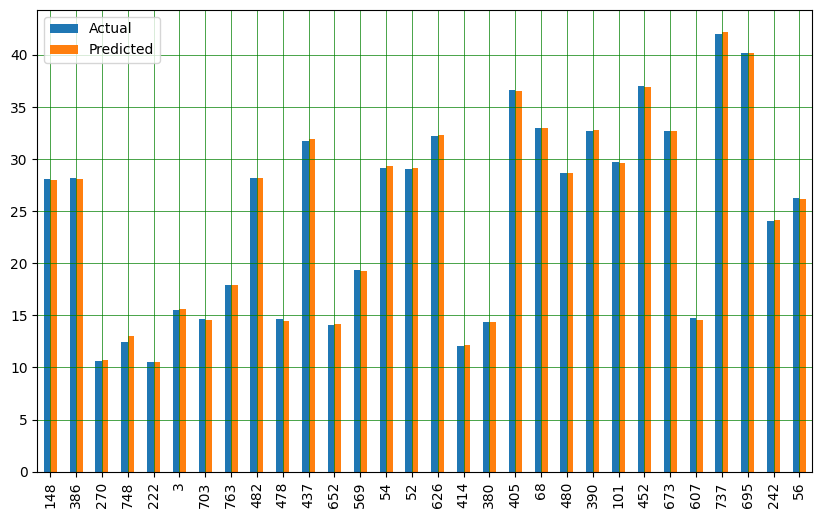

In [71]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [72]:
import sklearn.metrics as sm

# Calculate regression performance metrics
print("Mean absolute error =", round(sm.mean_absolute_error(testY, y_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(testY, y_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(testY, y_pred), 2))
print("Explained variance score =", round(sm.explained_variance_score(testY, y_pred), 2))
print("R2 score =",(sm.r2_score(testY, y_pred))*100)

Mean absolute error = 0.1
Mean squared error = 0.02
Median absolute error = 0.08
Explained variance score = 1.0
R2 score = 99.98239111097783


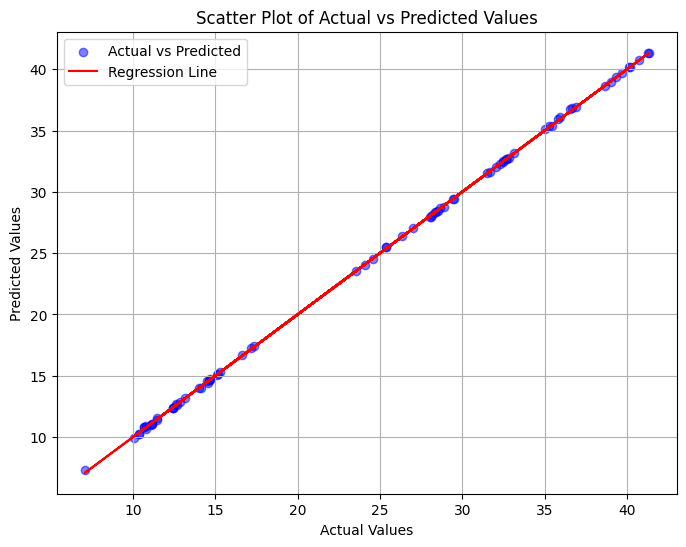

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(testY, y_pred, label='Actual vs Predicted', color='blue', alpha=0.5)

# Add regression line
plt.plot(testY, testY, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [16]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 500],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [19]:
grid = GridSearchCV(mlp_reg, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_) 


grid_predictions = grid.predict(testX_scaled) 
df_temp2 = pd.DataFrame({'Actual': testY, 'Predicted': grid_predictions})
df_temp2.head(10)

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'sgd'}


,Actual,Predicted
749,12.63,12.587833
752,14.12,14.059647
329,17.35,17.365895
148,28.07,28.146035
486,31.53,31.538089
535,35.96,35.856000
727,35.24,35.152516
534,36.66,36.540267
250,25.36,25.354742
202,26.33,26.339761


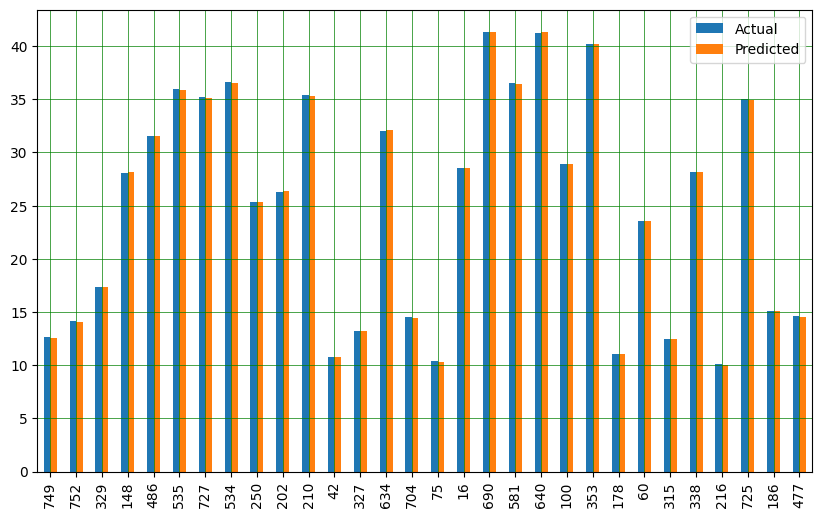

In [20]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, grid_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, grid_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, grid_predictions)))
print("R2 score =",sm.r2_score(testY, grid_predictions)*100)

Mean Absolute Error: 0.041806692606775844
Mean Squared Error: 0.0029919785121838454
Root Mean Squared Error: 0.05469898090626411
R2 score = 99.9973474563134
